### GENERAL

In [1]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import sqlite3

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
db_path= r'C:\PI\Proyecto Final\travel.sqlite'

In [7]:
conexion = sqlite3.connect(db_path)

In [10]:
df_tickets= pd.read_sql_query("SELECT * FROM tickets", conexion)

print(df_tickets.head())

       ticket_no book_ref passenger_id
0  0005432000987   06B046  8149 604011
1  0005432000988   06B046  8499 420203
2  0005432000989   E170C3  1011 752484
3  0005432000990   E170C3  4849 400049
4  0005432000991   F313DD  6615 976589


In [61]:
df_boarding_passes= pd.read_sql_query("SELECT * FROM boarding_passes", conexion)

print(df_boarding_passes.head())

       ticket_no  flight_id  boarding_no seat_no
0  0005435212351      30625            1      2D
1  0005435212386      30625            2      3G
2  0005435212381      30625            3      4H
3  0005432211370      30625            4      5D
4  0005435212357      30625            5     11A


In [17]:
df_bookings = pd.read_sql_query("SELECT * FROM bookings", conexion)


In [11]:
df_tickets.columns

Index(['ticket_no', 'book_ref', 'passenger_id'], dtype='object')

In [18]:
df_bookings.columns

Index(['book_ref', 'book_date', 'total_amount'], dtype='object')

In [13]:
df_tickets.shape

(366733, 3)

In [12]:
conteo_pasajeros = df_tickets.groupby('passenger_id').count()
print(conteo_pasajeros)

              ticket_no  book_ref
passenger_id                     
0000 000343           1         1
0000 035204           1         1
0000 076149           1         1
0000 112600           1         1
0000 214126           1         1
...                 ...       ...
9999 898268           1         1
9999 913541           1         1
9999 935084           1         1
9999 939010           1         1
9999 979738           1         1

[366733 rows x 2 columns]


##### Frecuencia

In [16]:
conteo_duplicados = df_tickets.duplicated(subset='passenger_id')[df_tickets.duplicated(subset='passenger_id')== True]
print(conteo_duplicados)

Series([], dtype: bool)


No se puede analizar frecuencia de viajes por cliente porque no tenemos base con datos de pasajero y aquí el passenger_id es un identificador único.

#### Estacionalidad

In [19]:
df_bookings['book_date'] = pd.to_datetime(df_bookings['book_date'])



In [29]:
df_bookings_fechas = df_bookings

In [31]:
df_bookings_fechas['Mes']=df_bookings_fechas.index.month
df_bookings_fechas['Año']=df_bookings_fechas.index.year
df_bookings_fechas['Dia']=df_bookings_fechas.index.day




In [34]:
bookings_año=df_bookings_fechas.groupby('Año')['total_amount'].sum()
bookings_mes=df_bookings_fechas.groupby('Mes')['total_amount'].sum()
bookings_dia=df_bookings_fechas.groupby('Dia')['total_amount'].sum()


print(bookings_año)
print(bookings_mes)
print(bookings_dia)




Año
2017    20766980900
Name: total_amount, dtype: int64
Mes
6      557361000
7    13234251800
8     6975368100
Name: total_amount, dtype: int64
Dia
1     729726100
2     774563000
3     812560400
4     860942400
5     875129600
6     890780400
7     895733600
8     898481100
9     923809800
10    927039300
11    928671600
12    919360300
13    942460300
14    985049500
15    836764200
16    448014600
17    430686400
18    440378400
19    448547900
20    445062300
21    437526400
22    428565000
23    435209400
24    439839000
25    470641500
26    463534000
27    482083600
28    537775600
29    575923400
30    642866700
31    439255100
Name: total_amount, dtype: int64


In [25]:
df_bookings.set_index('book_date', inplace=True)


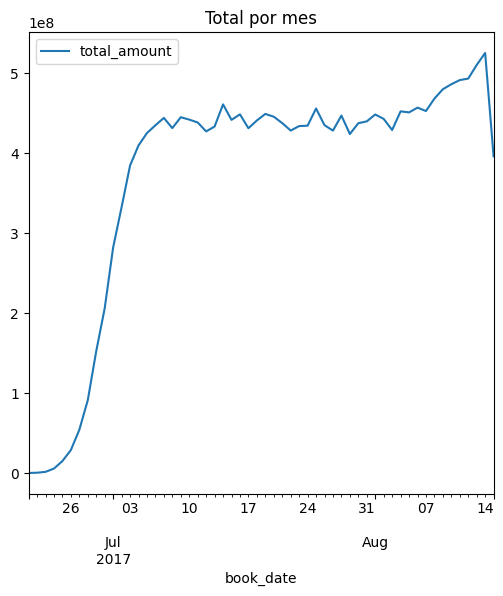

In [53]:
fig, ax = plt.subplots(figsize=(6,6))
df_bookings.resample('D').sum(numeric_only=True)['total_amount'].plot()
plt.title('Total por mes')
plt.legend(['total_amount'])
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_18060\2148920505.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_bookings.resample('M').sum(numeric_only=True)['total_amount'].plot()


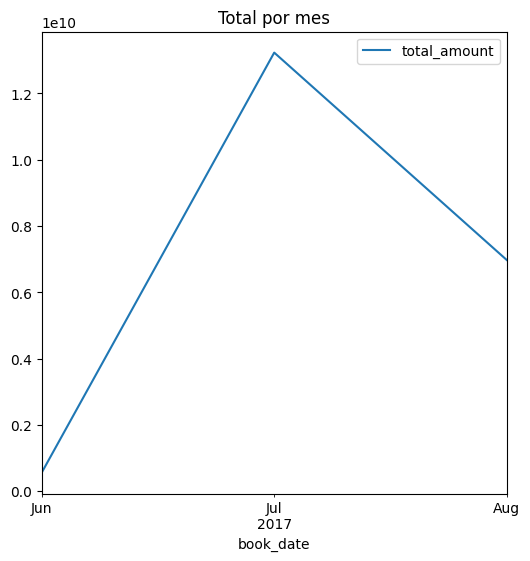

In [54]:
fig, ax = plt.subplots(figsize=(6,6))
df_bookings.resample('M').sum(numeric_only=True)['total_amount'].plot()
plt.title('Total por mes')
plt.legend(['total_amount'])
plt.show()

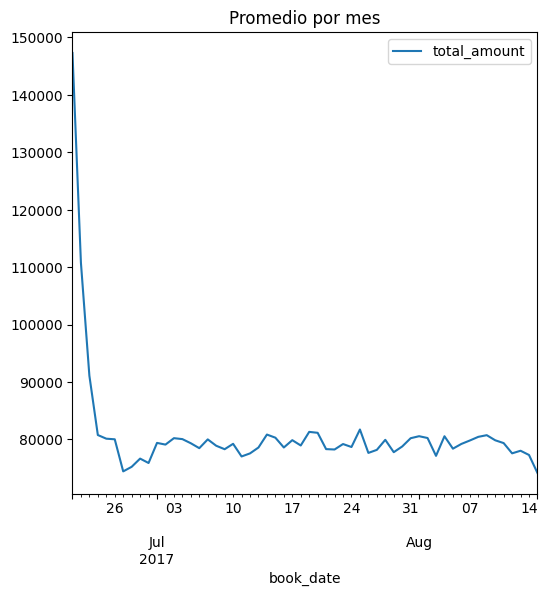

In [51]:
fig, ax = plt.subplots(figsize=(6,6))
df_bookings.resample('D').mean(numeric_only=True)['total_amount'].plot()
plt.title('Promedio por mes')
plt.legend(['total_amount'])
plt.show()

In [41]:
print(bookings_mes)

Mes
6      557361000
7    13234251800
8     6975368100
Name: total_amount, dtype: int64


In [48]:
print(df_bookings_fechas.head(5))

                          book_ref  total_amount  Mes   Año  Dia
book_date                                                       
2017-07-05 03:12:00+03:00   00000F        265700    7  2017    5
2017-07-14 09:02:00+03:00   000012         37900    7  2017   14
2017-08-15 14:27:00+03:00   000068         18100    8  2017   15
2017-08-10 13:28:00+03:00   000181        131800    8  2017   10
2017-08-07 21:40:00+03:00   0002D8         23600    8  2017    7


In [57]:
# Calcular la media y desviación estándar
mean = np.mean(df_bookings_fechas['total_amount'])
std = np.std(df_bookings_fechas['total_amount'])

# Calcular el Z-Score manualmente

# Calcular el Z-Score manualmente
df_bookings_fechas['zscore'] = (df_bookings_fechas['total_amount'] - mean) / std
df_bookings_sin_outliers= df_bookings_fechas[df_bookings_fechas['zscore']>3]

C:\Users\PC\AppData\Local\Temp\ipykernel_18060\234017814.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_bookings_sin_outliers.resample('M').sum(numeric_only=True)['total_amount'].plot()


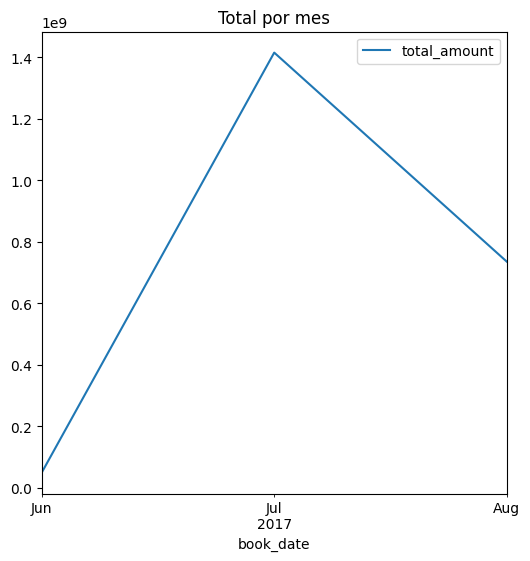

In [60]:
fig, ax = plt.subplots(figsize=(6,6))
df_bookings_sin_outliers.resample('M').sum(numeric_only=True)['total_amount'].plot()
plt.title('Total por mes')
plt.legend(['total_amount'])
plt.show()

Tenemos la información de junio, julio y agosto del año 2017. Por lo que no se puede analizar estacionalidad en el comportamiento de compra. Si podes decir que en estos 3 meses hubo una gran volatilidad en las ventas. Se analizo sinlos outliers y tambien se registra amplia volatilidad.

#### Tasa de conversion Booking a Boarding